In [20]:
try:
    import os
    import glob
    import numpy as np
    import pandas as pd

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline

except Exception as e:
    print(f"Error : {e}")

In [21]:
# Find the CSV file in the Datasets directory
data_path = '../Datasets/*.csv'
file_list = glob.glob(data_path)

for file in file_list:
    print(f"Found file: {file}")

# Ensure there is exactly one file
if len(file_list) == 1:
    # Load the dataset
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

Found file: ../Datasets/Dataset.csv
Loaded dataset: ../Datasets/Dataset.csv


In [22]:
# File path to save the trained model
destination = '../Models/'
os.makedirs(destination, exist_ok=True)
print(f"Model will be saved to: {destination}")

Model will be saved to: ../Models/


In [23]:
# Features (X) and target (y)
X = df.drop(columns=['Lifespan'])  # Features excluding the target variable
y = df['Lifespan']  # Target variable

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numerical features: Standard Scaling
numerical_transformer = StandardScaler()

# Preprocessing for categorical features: One-Hot Encoding
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Checking the shapes of the processed data
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training features shape: (800, 19)
Testing features shape: (200, 19)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1297.9724 - mse: 1812176.0000 - val_loss: 1320.5065 - val_mse: 1853516.7500
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1295.3257 - mse: 1787547.3750 - val_loss: 1318.3246 - val_mse: 1847811.3750
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 1295.8918 - mse: 1792265.7500 - val_loss: 1312.9196 - val_mse: 1833734.6250
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 1287.1062 - mse: 1777422.1250 - val_loss: 1300.6671 - val_mse: 1802031.0000
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 1250.3883 - mse: 1684878.7500 - val_loss: 1274.9397 - val_mse: 1736404.7500
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1251.8870 - mse: 1686835.5000 - val_loss: 1226.0216 - val_mse: 1615059.0000
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 1162.5562 - mse: 1470644.2500 - val_loss: 1139.5537 - val_mse: 1412661.0000
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8

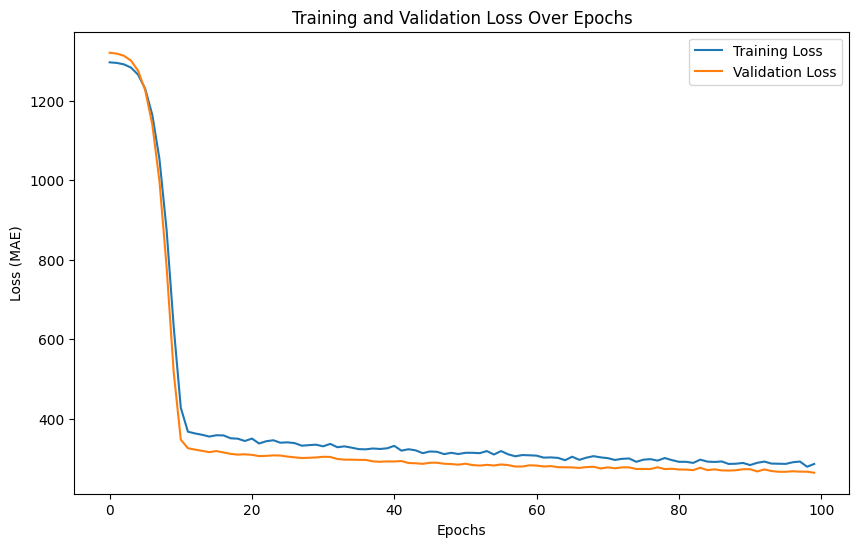

In [25]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
import numpy as np
import matplotlib.pyplot as plt

# Define the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))  # Increasing dropout to combat overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression output

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mae', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print(f"Neural Network RMSE: {rmse:.2f}")
print(f"Neural Network R² Score: {r2:.2f}")
print(f"Neural Network MAE: {mae:.2f}")
print(f"Neural Network MSLE: {msle:.2f}")

# Plot the loss during training
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()